# Task 1: Dataset

#### Importing pandas and numpy library

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetic_data.csv",header=None)
df.head()

C:\Users\xdcau\AppData\Local\Temp\ipykernel_16908\1421575704.py:4: DtypeWarning: Columns (0,1,6,7,8,9,12,13,14,15,16,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("diabetic_data.csv",header=None)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


#### Diabetes 130-US Hospitals for Years 1999-2008

Say something meaningful about your dataset. For example: Why did you select it? Is there anything interesting or special about it? What do or did hope to learn from it?


Our dataset was acquired from the UCI Machine Learning Repository. The data is about records of individuals that were diagnosed with Diabetes Type 2 and in clinical care acquired from 130 US hospitals, from 1998 to 2008. Our team took interest on this data because one of our team member, Matthew Jackson,is actually afflicted with this disease. However, his is type 1, which is more of a rare case and an uncommon one among diabetics.

# Task 2: Business Scenario

List one or more possible questions you would like to investigate using your dataset. You may start this project with one set of questions but (after exploring the dataset) finish with a new set of questions and answers.

In [2]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]) == False:
        print(df[col].value_counts())

encounter_id    1
190792044       1
190790070       1
190789722       1
190786806       1
               ..
106665324       1
106657776       1
106644876       1
106644474       1
443867222       1
Name: 0, Length: 101767, dtype: int64
88785891     40
43140906     28
88227540     23
23199021     23
84428613     22
             ..
23522094      1
10859103      1
1102689       1
11224854      1
175429310     1
Name: 1, Length: 73400, dtype: int64
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
race                   1
Name: 2, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
gender                 1
Name: 3, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
age             1
Name: 4, dtype: int64
?           

No              101763
Steady               3
troglitazone         1
Name: 37, dtype: int64
No            101727
Steady            38
tolazamide         1
Up                 1
Name: 38, dtype: int64
No         101766
examide         1
Name: 39, dtype: int64
No             101766
citoglipton         1
Name: 40, dtype: int64
No         47383
Steady     30849
Down       12218
Up         11316
insulin        1
Name: 41, dtype: int64
No                     101060
Steady                    692
Up                          8
Down                        6
glyburide-metformin         1
Name: 42, dtype: int64
No                     101753
Steady                     13
glipizide-metformin         1
Name: 43, dtype: int64
No                          101765
glimepiride-pioglitazone         1
Steady                           1
Name: 44, dtype: int64
No                         101764
Steady                          2
metformin-rosiglitazone         1
Name: 45, dtype: int64
No                        10

In [3]:
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,101767,101767,101767,101767,101767,101767,101767,101767,101767,101767,...,101767,101767,101767,101767,101767,101767,101767,101767,101767,101767
unique,101767,73400,7,4,11,11,16,45,28,29,...,2,5,5,3,3,3,3,3,3,4
top,encounter_id,88785891,Caucasian,Female,[70-80),?,1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
freq,1,40,76099,54708,26068,98569,45934,51546,49209,15201,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


# Task 3: Preprocessing

#### Open and read CSV File

In [4]:
df.columns = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'
]
df.drop(index=df.index[0], axis=0, inplace=True)

data = df.copy()
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(data.describe())
print(data.head())
print(data.dtypes.value_counts())

The dataset has 101766 rows and 50 columns
       encounter_id  patient_nbr       race  gender      age  weight  \
count        101766       101766     101766  101766   101766  101766   
unique       101766        73399          6       3       10      10   
top         2278392     88785891  Caucasian  Female  [70-80)       ?   
freq              1           40      76099   54708    26068   98569   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count              101766                    101766               101766   
unique                 15                        44                   27   
top                     1                         1                    7   
freq                45934                     51546                49209   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
count             101766  ...      101766  101766               101766   
unique                28  ...           1       4                  

#### Converting categorical values to numeric 

In [5]:
data['weight'] = pd.to_numeric(data['weight'],errors='coerce') # weight in pounds
data['admission_type_id'] = pd.to_numeric(data['admission_type_id'],errors='coerce') # mixed data types,change all values to numeric
data['discharge_disposition_id'] = pd.to_numeric(data['discharge_disposition_id'],errors='coerce') # mixed data types,change all values to numeric
data['time_in_hospital'] = pd.to_numeric(data['time_in_hospital'],errors='coerce') # number of days between admission and discharge
data['num_lab_procedures'] = pd.to_numeric(data['num_lab_procedures'],errors='coerce') # number of lab test during the encounter
data['num_procedures'] = pd.to_numeric(data['num_procedures'],errors='coerce') # number of procedures other than lab test, during the encounter
data['num_medications'] = pd.to_numeric(data['num_medications'],errors='coerce') # number of distinct generic names administered during the encounter
data['number_outpatient'] = pd.to_numeric(data['number_outpatient'],errors='coerce') # number of outpatient visits in the year preceding the encounter
data['number_emergency'] = pd.to_numeric(data['number_emergency'],errors='coerce') # number of emergency visits in the year preceding the encounter
data['number_inpatient'] = pd.to_numeric(data['number_inpatient'],errors='coerce') # number of inpatient visits in the year preceding the encounter
data['number_diagnoses'] = pd.to_numeric(data['number_diagnoses'],errors='coerce') # number of diagnoses entered to the system

In [6]:
numeric_attributes = data.columns[data.dtypes!="object"]
categorical_attributes =data.columns[data.dtypes=="object"]

print(data.dtypes.value_counts())
print(numeric_attributes)
print(categorical_attributes)

object     39
int64      10
float64     1
dtype: int64
Index(['weight', 'admission_type_id', 'discharge_disposition_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      d

#### Replacing missing values with a user defined constant

In [7]:
print('Before replacing missing values:')
data.head(20)

Before replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
data_1 = data.copy()
data_1 = data_1.fillna("?")
data_1 = data_1.replace('?', pd.NA)

In [9]:
data_1["admission_type_id"] = data_1["admission_type_id"].replace(1, "Emergency")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(2, "Urgent")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(3, "Elective")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(4, "Newborn")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(5, "Trauma Center")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(6, "Transfer")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(7, "Hospice")
data_1["admission_type_id"] = data_1["admission_type_id"].replace(8, "Unknown")

data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(1, "Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(2, "Short Term Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(3, "SNF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(4, "ICF")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(5, "Inpatient Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(6, "Home w/ Home Health Service")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(7, "Left Against Medical Advice")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(8, "Home Under Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(9, "Admitted as an inpatient")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(10, "Nenonate Discharge/Neonatal Aftercare")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(11, "Expired")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(12, "Expected Return for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(13, "Hospice/Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(14, "Hospice/Medical Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(15, "Medicare-approved Swing Bed")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(16, "Transferred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(17, "Referred for Outpatient Services")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(18, "NULL")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(19, "Expired at Home")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(20, "Expired at Medical facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(21, "Expired, Place Unknown")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(22, "Rehabilitation Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(23, "Long Term Care")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(24, "Nursing Facility-Medicaid Certified")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(25, "Not Mapped")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(26, "Unknown/Invalid")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(27, "Federal Health Facility")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(28, "Psychiatric Hospital/Unit")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(29, "Critical Access Hospital")
data_1["discharge_disposition_id"] = data_1["discharge_disposition_id"].replace(30, "Health Care Facility not Defined Elsewhere")

print('After replacing missing values:')
data_1.head(98053)

After replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),NaN,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),NaN,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),NaN,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),NaN,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98049,396041390,97699437,Caucasian,Male,[80-90),NaN,Emergency,Short Term Hospital,7,6,...,No,No,No,No,No,No,No,No,No,<30
98050,396041570,85821255,Caucasian,Male,[80-90),NaN,Emergency,Home w/ Home Health Service,7,4,...,No,No,No,No,No,No,No,No,No,<30
98051,396049028,32565870,Caucasian,Female,[50-60),NaN,Urgent,Home,1,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
98052,396049982,38672559,<NA>,Female,[80-90),NaN,Emergency,SNF,7,4,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [10]:
print('After replacing missing values:')
data.head(30)

After replacing missing values:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Removal of rows containing missing values

In [11]:
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))

data_1.head(20)

There are 196046 missing values in this dataset
Number of instances = 101766
Number of attributes = 50
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:2273
	gender:0
	age:0
	weight:101766
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:40256
	medical_specialty:49949
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:21
	diag_2:358
	diag_3:1423
	number_diagnoses:0
	max_glu_serum:0
	A1Cresult:0
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),<NA>,Transfer,Not Mapped,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),<NA>,Emergency,Home,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,Emergency,Home,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),<NA>,Emergency,Home,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),<NA>,Emergency,Home,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),<NA>,Urgent,Home,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),<NA>,Elective,Home,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),<NA>,Emergency,Home,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),<NA>,Urgent,Home,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),<NA>,Elective,SNF,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
data_1 = data_1.dropna(subset=["race", "diag_1", "diag_2", "diag_3"])

#### Removal of attributes containing missing values

In [13]:
data_1.drop('weight', axis=1, inplace=True) # 98053 records with missing values, deemed unusable

In [14]:
print(f"There are {data_1.isnull().sum().sum()} missing values in this dataset")

print('Number of instances = %d'%(data_1.shape[0]))
print('Number of attributes = %d'%(data_1.shape[1]))

print('Number of missing values:')
for col in data_1.columns:
    print('\t%s:%d'%(col,data_1[col].isna().sum()))
    
print(data_1.describe())
print(data_1.head())

There are 87242 missing values in this dataset
Number of instances = 98053
Number of attributes = 49
Number of missing values:
	encounter_id:0
	patient_nbr:0
	race:0
	gender:0
	age:0
	admission_type_id:0
	discharge_disposition_id:0
	admission_source_id:0
	time_in_hospital:0
	payer_code:38924
	medical_specialty:48318
	num_lab_procedures:0
	num_procedures:0
	num_medications:0
	number_outpatient:0
	number_emergency:0
	number_inpatient:0
	diag_1:0
	diag_2:0
	diag_3:0
	number_diagnoses:0
	max_glu_serum:0
	A1Cresult:0
	metformin:0
	repaglinide:0
	nateglinide:0
	chlorpropamide:0
	glimepiride:0
	acetohexamide:0
	glipizide:0
	glyburide:0
	tolbutamide:0
	pioglitazone:0
	rosiglitazone:0
	acarbose:0
	miglitol:0
	troglitazone:0
	tolazamid:0
	examide:0
	citoglipton:0
	insulin:0
	glyburide-metformin:0
	glipizide-metformin:0
	glimepiride-pioglitazone:0
	metformin-rosiglitazone:0
	metformin-pioglitazone:0
	change:0
	diabetesMed:0
	readmitted:0
       time_in_hospital  num_lab_procedures  num_procedures

# Task 4: Association Rule Mining (ARM) Method

## Apriori

In [15]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

#### Select required features for subsetting data_1

In [16]:
# subset data for apriori and fp-growth method
# purpose is to find item sets between medications and other attributes

apri_data = data_1.copy()
apri_data = apri_data[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'num_lab_procedures', 'num_medications', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]]

#### Binning and changing values into user defined constants

In [17]:
# both number of medications and lab procedures binned into 3
apri_data['num_medications'] = pd.qcut(apri_data['num_medications'], 3, labels=[0, 1, 2])
apri_data['num_lab_procedures'] = pd.qcut(apri_data['num_lab_procedures'], 3, labels=[0, 1, 2])
apri_data = apri_data.fillna(0)

# bin values changed into low, med, and high, representing the levels of distribution
apri_data['num_medications'] = apri_data['num_medications'].replace(0, "low_num_med")
apri_data['num_medications'] = apri_data['num_medications'].replace(1, "med_num_med")
apri_data['num_medications'] = apri_data['num_medications'].replace(2, "high_num_med")

apri_data['num_lab_procedures'] = apri_data['num_lab_procedures'].replace(0, "low_num_proc")
apri_data['num_lab_procedures'] = apri_data['num_lab_procedures'].replace(1, "med_num_proc")
apri_data['num_lab_procedures'] = apri_data['num_lab_procedures'].replace(2, "high_num_proc")

# a1cresult values changed into no, moderate, and high, representing levels of risk
apri_data["A1Cresult"] = apri_data["A1Cresult"].replace(">7", "Moderate Risk")
apri_data["A1Cresult"] = apri_data["A1Cresult"].replace(">8", "High Risk")
apri_data["A1Cresult"] = apri_data["A1Cresult"].replace("Norm", "Normal")
apri_data["A1Cresult"] = apri_data["A1Cresult"].replace("None", "Not Measured")

apri_data.head(100)

,race,gender,age,admission_type_id,discharge_disposition_id,num_lab_procedures,num_medications,A1Cresult,metformin,repaglinide,...,troglitazone,tolazamid,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
2,Caucasian,Female,[10-20),Emergency,Home,high_num_proc,med_num_med,Not Measured,No,No,...,No,No,No,No,Up,No,No,No,No,No
3,AfricanAmerican,Female,[20-30),Emergency,Home,low_num_proc,med_num_med,Not Measured,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Caucasian,Male,[30-40),Emergency,Home,med_num_proc,med_num_med,Not Measured,No,No,...,No,No,No,No,Up,No,No,No,No,No
5,Caucasian,Male,[40-50),Emergency,Home,med_num_proc,low_num_med,Not Measured,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,Caucasian,Male,[50-60),Urgent,Home,low_num_proc,med_num_med,Not Measured,No,No,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,AfricanAmerican,Female,[70-80),Emergency,Home,low_num_proc,low_num_med,Not Measured,No,No,...,No,No,No,No,Down,No,No,No,No,No
106,Caucasian,Male,[80-90),Emergency,Home w/ Home Health Service,low_num_proc,low_num_med,Not Measured,No,No,...,No,No,No,No,No,No,No,No,No,No
107,Other,Female,[50-60),Emergency,Home,high_num_proc,high_num_med,Not Measured,No,No,...,No,No,No,No,Up,No,No,No,No,No
108,Caucasian,Female,[80-90),Emergency,Home,low_num_proc,low_num_med,Normal,No,No,...,No,No,No,No,No,No,No,No,No,No


#### Listing  and one-hot coding unique values into columns

In [18]:
# listing unique values
items = set()
for col in apri_data:
    items.update(apri_data[col].unique())
print(items)

{'Urgent', 'Left Against Medical Advice', 'Home Under Care', 'Nursing Facility-Medicaid Certified', '[60-70)', 'No', 'Federal Health Facility', 'Expired at Medical facility', 'Trauma Center', 'med_num_proc', 'SNF', '[70-80)', 'Emergency', 'Home', '[20-30)', 'Expired', 'Nenonate Discharge/Neonatal Aftercare', 'High Risk', '[40-50)', 'Down', '[30-40)', 'AfricanAmerican', 'Elective', '[0-10)', 'low_num_med', '[10-20)', 'Inpatient Care', 'Male', 'Hospice/Home', 'low_num_proc', 'Female', 'Caucasian', 'Short Term Hospital', 'Unknown/Invalid', 'Not Mapped', 'NULL', 'Transfer', 'Hispanic', 'Home w/ Home Health Service', '[90-100)', 'Long Term Care', 'Other', 'Medicare-approved Swing Bed', 'Expired at Home', 'Up', 'high_num_proc', 'Moderate Risk', 'Asian', 'Unknown', 'Hospice/Medical Facility', 'Psychiatric Hospital/Unit', 'Rehabilitation Facility', 'med_num_med', 'Steady', 'Referred for Outpatient Services', '[80-90)', 'Hospice', 'Transferred for Outpatient Services', 'Normal', 'Expected Retur

In [19]:
# one-hot coding

itemset = set(items)
encoded_vals = []
for index, row in apri_data.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_apri_data = pd.DataFrame(encoded_vals)
ohe_apri_data

,Urgent,Left Against Medical Advice,Nursing Facility-Medicaid Certified,Federal Health Facility,Expired at Medical facility,med_num_proc,[20-30),Expired,High Risk,Down,...,Female,Caucasian,No,med_num_med,[10-20),Up,high_num_proc,Emergency,Home,Not Measured
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,0,0,0,1,1,1
2,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,1,0,1,1,1
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,0,0,0,0,0,1,0,0,1,1,...,0,0,1,1,0,0,0,1,0,0
98049,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,1
98050,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,1,1,1
98051,1,0,0,0,0,1,0,0,0,0,...,1,1,1,0,0,1,0,0,0,1


In [20]:
data_2 = pd.get_dummies(data_1[['insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]])
ohe_apri_data = pd.concat((data_2, ohe_apri_data), axis=1)
ohe_apri_data = ohe_apri_data.drop(['Up', 'Down', 'No', 'Steady'], axis=1)

ohe_apri_data = ohe_apri_data.dropna()
ohe_apri_data

,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,...,ICF,Admitted as an inpatient,Female,Caucasian,med_num_med,[10-20),high_num_proc,Emergency,Home,Not Measured
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98047,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
98048,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
98049,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
98050,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


#### Finding frequent item sets and association rules using apriori functions
#### Support = 0.7

In [21]:
# finding item sets using apriori
# support set at 0.7 as this the only parameter value that results in 2 item pair
# anything other than this parameter yields unsatisfying results

freq_items = apriori(ohe_apri_data, min_support=0.5, use_colnames=True, verbose=1)
freq_items.head()

C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 70 combinations | Sampling itemset size 76


,support,itemsets
0,0.993289,(glyburide-metformin_No)
1,0.999862,(glipizide-metformin_No)
2,0.999989,(glimepiride-pioglitazone_No)
3,1.000000,(metformin-rosiglitazone_No)
4,1.000000,(metformin-pioglitazone_No)


#### confidence = 0.7

In [22]:
# set confidence at 0.6, no meaningful changes in result beyond this value
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(glipizide-metformin_No),(glyburide-metformin_No),0.999862,0.993289,0.993184,0.993320,1.000031,3.083038e-05,1.004616,0.225596
1,(glyburide-metformin_No),(glipizide-metformin_No),0.993289,0.999862,0.993184,0.999893,1.000031,3.083038e-05,1.291276,0.004626
2,(glyburide-metformin_No),(glimepiride-pioglitazone_No),0.993289,0.999989,0.993279,0.999989,1.000000,-7.102922e-08,0.993289,-0.000011
3,(glimepiride-pioglitazone_No),(glyburide-metformin_No),0.999989,0.993289,0.993279,0.993289,1.000000,-7.102922e-08,0.999989,-0.006711
4,(metformin-rosiglitazone_No),(glyburide-metformin_No),1.000000,0.993289,0.993289,0.993289,1.000000,0.000000e+00,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2349,"(metformin-pioglitazone_No, Not Measured)","(Caucasian, glimepiride-pioglitazone_No, metfo...",0.834849,0.761434,0.640727,0.767477,1.007937,5.045193e-03,1.025990,0.047678
2350,"(glipizide-metformin_No, Not Measured)","(Caucasian, glimepiride-pioglitazone_No, metfo...",0.834753,0.761529,0.640727,0.767565,1.007926,5.038208e-03,1.025967,0.047585
2351,"(glyburide-metformin_No, Not Measured)","(Caucasian, glimepiride-pioglitazone_No, metfo...",0.829313,0.766515,0.640727,0.772600,1.007939,5.046884e-03,1.026762,0.046148
2352,(Caucasian),"(glimepiride-pioglitazone_No, metformin-rosigl...",0.766652,0.829218,0.640727,0.835747,1.007874,5.005803e-03,1.039752,0.033481


## FP-Growth

In [23]:
from mlxtend.frequent_patterns import fpgrowth

#### Finding frequent item sets and association rules using apriori functions
#### Support = 0.6

In [24]:
# uses the ohe data from apriori
freq_items_2 = fpgrowth(ohe_apri_data, min_support=0.6, use_colnames=True)
freq_items_2

C:\Users\xdcau\OneDrive - James Cook University\CP2403\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,1.000000,(metformin-pioglitazone_No)
1,1.000000,(metformin-rosiglitazone_No)
2,0.999989,(glimepiride-pioglitazone_No)
3,0.999862,(glipizide-metformin_No)
4,0.993289,(glyburide-metformin_No)
...,...,...
122,0.640727,"(Caucasian, glimepiride-pioglitazone_No, glipi..."
123,0.640738,"(Caucasian, metformin-rosiglitazone_No, metfor..."
124,0.640727,"(Caucasian, glimepiride-pioglitazone_No, metfo..."
125,0.640727,"(Caucasian, glimepiride-pioglitazone_No, metfo..."


#### Confidence = 0.7

In [25]:
rules = association_rules(freq_items_2, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(metformin-rosiglitazone_No),(metformin-pioglitazone_No),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf,0.000000
1,(metformin-pioglitazone_No),(metformin-rosiglitazone_No),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf,0.000000
2,(metformin-rosiglitazone_No),(glimepiride-pioglitazone_No),1.000000,0.999989,0.999989,0.999989,1.000000,0.000000,1.000000,0.000000
3,(glimepiride-pioglitazone_No),(metformin-rosiglitazone_No),0.999989,1.000000,0.999989,1.000000,1.000000,0.000000,inf,0.000000
4,(glimepiride-pioglitazone_No),(metformin-pioglitazone_No),0.999989,1.000000,0.999989,1.000000,1.000000,0.000000,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...
1262,"(Caucasian, metformin-pioglitazone_No)","(glimepiride-pioglitazone_No, metformin-rosigl...",0.766652,0.829218,0.640727,0.835747,1.007874,0.005006,1.039752,0.033481
1263,"(glipizide-metformin_No, Caucasian)","(glimepiride-pioglitazone_No, metformin-rosigl...",0.766525,0.829302,0.640727,0.835886,1.007938,0.005046,1.040114,0.033733
1264,"(Caucasian, glyburide-metformin_No)","(glimepiride-pioglitazone_No, metformin-rosigl...",0.761540,0.834743,0.640727,0.841358,1.007924,0.005037,1.041696,0.032970
1265,"(Caucasian, Not Measured)","(glimepiride-pioglitazone_No, metformin-rosigl...",0.645099,0.993173,0.640727,0.993224,1.000051,0.000033,1.007479,0.000144


### Results and Findings: ARM & FP Growth

# Task 5: Classification

## Binary Classification

#### Setting up the classification data

In [26]:
class_data = data_1.copy()
class_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Home,7,3,<NA>,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Home,7,2,<NA>,...,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),Emergency,Home,7,2,<NA>,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),Emergency,Home,7,1,<NA>,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),Urgent,Home,2,3,<NA>,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [27]:
class_data["A1Cresult"] = class_data["A1Cresult"].replace(">7", "Risk")
class_data["A1Cresult"] = class_data["A1Cresult"].replace(">8","Risk")
class_data["A1Cresult"] = class_data["A1Cresult"].replace("Norm", "Normal")
class_data["A1Cresult"] = class_data["A1Cresult"].replace("None", pd.NA)

In [28]:
class_data = class_data[['age', 'race', 'gender', 'A1Cresult', 'diabetesMed']]

In [29]:
class_data['race'] = pd.Categorical(class_data['race'])
class_data['gender'] = pd.Categorical(class_data['gender'])
class_data['A1Cresult'] = pd.Categorical(class_data['A1Cresult'])
class_data['diabetesMed'] = pd.Categorical(class_data['diabetesMed'])
print(class_data.dtypes)

age              object
race           category
gender         category
A1Cresult      category
diabetesMed    category
dtype: object


In [30]:
data_2 = data_1.copy()
data_2 = pd.get_dummies(data_2[['age', 'race', 'gender', 'diabetesMed']])
class_data = pd.concat((data_2, class_data), axis=1)
class_data = class_data.drop(['age', 'race', 'gender', 'diabetesMed'], axis=1)

class_data = class_data.dropna()
class_data

,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),...,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,diabetesMed_No,diabetesMed_Yes,A1Cresult
27,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,Risk
75,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,Risk
99,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,Risk
104,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,Normal
108,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101750,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,Normal
101752,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,Normal
101755,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,Risk
101756,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,Risk


#### Training and Test set creation

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Y = class_data['A1Cresult']
X = class_data.drop(['A1Cresult'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#### Model Fitting and Evaluation

In [ ]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc= np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    index += 1

#### Plot of Training and Test Accuracies

In [ ]:
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

## Decision Tree

In [ ]:
clf_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_dt = clf_dt.fit(X, Y)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf_dt.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_dt.score(x_test, y_test)))

plt.figure(figsize=(25, 10))
tree.plot_tree(clf_dt, feature_names=['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
                                   'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
                                   'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 
                                   'race', 'gender_Male', 'gender_Female', 'num_medications_low', 'num_medications_med',
                                    'num_medications_high','diabetesMed_Yes', 'diabetesMed_No', 'A1Cresult'], 
                                   class_names=['Risk', 'Normal'], filled=True, rounded=True, fontsize=12)
plt.show()

test_pred_decision_tree = clf_dt.predict(x_test)

#### Further analysis of DT using the Confusion Matrix and Metrics

In [ ]:
from sklearn import metrics
import seaborn as sns

confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)
matrix_class_data = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_class_data, annot=True, fmt='g', ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted Label", fontsize = 15)
ax.set_xticklabels(['Risk', 'Normal'])
ax.set_ylabel('True Label', fontsize=15)
ax.set_yticklabels(['Risk', 'Normal'], rotation=0)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, test_pred_decision_tree))

## K-NN Classifier

In [ ]:
print(class_data.dtypes)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

test_pred_knn = knn.predict(x_test)

#### Further analysis of K-NN using the Confusion Matrix and Metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_knn)
matrix_class_data = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_class_data, annot=True, fmt='g', ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - KNN')
ax.set_xlabel("Predicted Label", fontsize = 15)
ax.set_xticklabels(['Risk', 'Normal'])
ax.set_ylabel('True Label', fontsize=15)
ax.set_yticklabels(['Risk', 'Normal'], rotation=0)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, test_pred_knn))

## Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB on training set: {:.2f}'.format(gnb.score(x_train, y_train)))
print('Accuracy of GNB on test set: {:.2f}'.format(gnb.score(x_test, y_test)))

test_pred_gnb = gnb.predict(x_test)

#### Further analysis of Naive bayes using the Confusion Matrix and Metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_gnb)
matrix_class_data = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_class_data, annot=True, fmt='g', ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Naive Bayes')
ax.set_xlabel("Predicted Label", fontsize = 15)
ax.set_xticklabels(['Risk', 'Normal'])
ax.set_ylabel('True Label', fontsize=15)
ax.set_yticklabels(['Risk', 'Normal'], rotation=0)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, test_pred_gnb))

## Support Vector Machine Classification

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Accuracy of SVM on training set: {:.2f}'.format(svm.score(x_train, y_train)))
print('Accuracy of SVM on test set: {:.2f}'.format(svm.score(x_test, y_test)))

test_pred_svm = svm.predict(x_test)

#### Further analysis of Naive bayes using the Confusion Matrix and Metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_svm)
matrix_class_data = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_class_data, annot=True, fmt='g', ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Support vector Machine')
ax.set_xlabel("Predicted Label", fontsize = 15)
ax.set_xticklabels(['Risk', 'Normal'])
ax.set_ylabel('True Label', fontsize=15)
ax.set_yticklabels(['Risk', 'Normal'], rotation=0)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, test_pred_svm))

## One-R Classification

In [ ]:
class OneR(object):
    
    def __init__(self):
        self.ideal_variable = None
        self.max_accuracy = 0
        
    def fit(self, X, y):
        response = list()
        result = dict()
        
        dfx = pd.DataFrame(X)
        
        for i in dfx:
            result[str(i)] = dict()
            options_values = set(dfx[i])
            join_data = pd.DataFrame({"variable":dfx[i], "label":y})
            cross_table = pd.crosstab(join_data.variable, join_data.label)
            summary = cross_table.idxmax(axis=1)
            result[str(i)] = dict(summary)
            
            counts = 0
            
            for idx, row in join_data.iterrows():
                if row['label'] == result[str(i)][row['variable']]:
                    counts += 1
            
            accuracy = (counts/len(y))
            
            
            if accuracy > self.max_accuracy:
                self.max_accuracy = accuracy
                self.ideal_variable = i
                
            result_feature = {"variable": str(i), "accuracy":accuracy, "rules":result[str(i)]}
            response.append(result_feature)
            
        return response
    
    def predict(self, X=None):
        self_ideal_variable = self.ideal_variable + 1
        
    def __repr__(self):
        if self.ideal_variable != None:
            txt = "The best variable for this data is:" + str(self.ideal_variable)
        else:
            txt = "The best variable has not been found yet, try running the fit method first"
            
        return txt

In [ ]:
clf_one_r = OneR()
test_results = clf_one_r.fit(x_test, y_test)

print(test_results)
print(clf_one_r)

# Task 6: Clustering

Introduction:

The dataset comprises a decade (1999-2008) of clinical records from diabetes patients across 130 US healthcare facilities. My aim is to explore patterns in medication dosage changes using clustering methods, potentially uncovering associations with disease progression.

To achieve this, I employed three clustering methods: K-means, DBSCAN, and Hierarchical clustering. Following each method, I will analyze and compare the results to gain insights.

## K-Means

#### Setting up the clustering data

In [31]:
#using our team's processed dataset (data_1) for clustering analysis
cluster_data = data_1.copy()

# get the number of instances and attributes in the dataset
instance_count, feature_count = cluster_data.shape
print(f'Number of instances: {instance_count}, Number of attributes: {feature_count}')

Number of instances: 98053, Number of attributes: 49


#### Choosing medication-related columns from the clustering data

In [32]:
print(cluster_data.columns)

medical_data=cluster_data[["metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide","glipizide","glyburide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","examide","citoglipton","insulin","glyburide-metformin","glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","tolbutamide"]]
medical_data

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamid', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
2,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
3,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
5,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101762,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101763,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
101764,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101765,No,No,No,No,No,No,Steady,No,Steady,No,...,No,No,No,No,Up,No,No,No,No,No


#### Converting medication dosage to numerical values: "No" -> 0, "Down" -> 1, "Steady" -> 2, "Up" -> 3

In [33]:
mapping = {"No": 0, "Down": 1, "Steady": 2, "Up": 3}

# Replace medication dosage values in the DataFrame
medical_data.replace(mapping, inplace=True)

# Display the transformed DataFrame
print(medical_data.head(15))

    metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  \
2           0            0            0               0            0   
3           0            0            0               0            0   
4           0            0            0               0            0   
5           0            0            0               0            0   
6           0            0            0               0            0   
7           2            0            0               0            2   
8           0            0            0               0            0   
9           0            0            0               0            0   
10          0            0            0               0            0   
11          0            0            0               0            0   
12          0            0            0               0            0   
13          2            3            0               0            0   
14          0            0            0               0         

C:\Users\xdcau\AppData\Local\Temp\ipykernel_16908\3205169773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical_data.replace(mapping, inplace=True)


#### Applying K-Means clustering with 2 clusters and 50 maximum iterations

In [34]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(medical_data.values) 

# Obtaining cluster labels
labels = k_means.labels_

# Renaming 'patient_nbr' to 'patient_ID'
cluster_data.rename(columns={'patient_nbr': 'patient_ID'}, inplace=True)

# Creating DataFrame of cluster labels with patient IDs
pd.DataFrame(labels, cluster_data.patient_ID , columns=['Cluster ID'])

,Cluster ID
patient_ID,
55629189,0
86047875,1
82442376,0
42519267,0
82637451,0
...,...
100162476,1
74694222,0
41088789,1


#### Calculating centroids of the clusters and displaying them

In [35]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids, columns=medical_data.columns)

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
0,0.391015,0.030794,0.014677,0.000770,0.111133,4.966846e-05,0.247796,0.182258,0.148385,0.134105,...,0.000596,0.000050,0.0,0.0,2.270668,0.014478,4.966846e-05,0.0,4.966846e-05,0.000348
1,0.401672,0.032326,0.013896,0.002423,0.097428,-6.911789e-19,0.256135,0.232513,0.144204,0.121517,...,0.000831,0.000069,0.0,0.0,0.204946,0.013117,-6.911789e-19,0.0,-6.911789e-19,0.000519


In [36]:
# Generating descriptive statistics for the dataset
medical_data.describe()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,...,98053.000000,98053.000000,98053.0,98053.0,98053.000000,98053.000000,98053.000000,98053.0,98053.000000,98053.000000
mean,0.397295,0.031697,0.014217,0.001744,0.103057,0.000020,0.252710,0.211875,0.145921,0.126687,...,0.000734,0.000061,0.0,0.0,1.053267,0.013676,0.000020,0.0,0.000020,0.000449
std,0.813788,0.255353,0.169774,0.060484,0.450839,0.006387,0.677535,0.630538,0.525666,0.491725,...,0.038581,0.011063,0.0,0.0,1.099934,0.165284,0.006387,0.0,0.006387,0.029955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,0.0,0.0,3.000000,3.000000,2.000000,0.0,2.000000,2.000000


#### Generating random test data

In [37]:
possible_values = [0, 1, 2, 3]
num_features = 21
num_samples = 5
test_data = []

# Creating random test instances
for _ in range(num_samples):
    test_instance = np.random.choice(possible_values, size=num_features)
    test_data.append(test_instance.tolist())

# Converting test data to NumPy array
test_data = np.array(test_data)

# Predicting cluster labels for test data
labels = k_means.predict(test_data)
labels = labels.reshape(-1,1)

# Assigning patient IDs
patient_ids = np.array(['patient1', 'patient2', 'patient3', 'patient4', 'patient5']).reshape(-1,1)

# Inserting patient ID and cluster ID into columns
cols = medical_data.columns.tolist()
cols.insert(0, "patient_ID")
cols.append('Cluster ID')

# Displaying test data
print(test_data)

[[0 3 3 2 1 2 2 3 3 0 2 2 3 1 1 1 3 0 0 1 2]
 [2 2 1 2 1 0 0 3 2 1 1 0 1 2 1 2 1 2 1 0 2]
 [0 0 3 3 0 3 0 3 0 1 0 1 3 2 1 0 3 2 3 1 1]
 [1 3 0 1 2 0 0 2 2 1 1 3 3 1 0 3 3 3 1 1 2]
 [0 2 3 3 1 3 0 2 2 3 2 2 2 0 0 2 2 3 0 1 1]]


#### Displaying test data's cluster category result

In [38]:
result = pd.DataFrame(np.concatenate((patient_ids, test_data, labels), axis=1), columns=cols)
result

,patient_ID,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,...,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide,Cluster ID
0,patient1,0,3,3,2,1,2,2,3,3,...,3,1,1,1,3,0,0,1,2,1
1,patient2,2,2,1,2,1,0,0,3,2,...,1,2,1,2,1,2,1,0,2,0
2,patient3,0,0,3,3,0,3,0,3,0,...,3,2,1,0,3,2,3,1,1,1
3,patient4,1,3,0,1,2,0,0,2,2,...,3,1,0,3,3,3,1,1,2,0
4,patient5,0,2,3,3,1,3,0,2,2,...,2,0,0,2,2,3,0,1,1,0


##### Calculating SSE to determine the optimal K value

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'SSE')

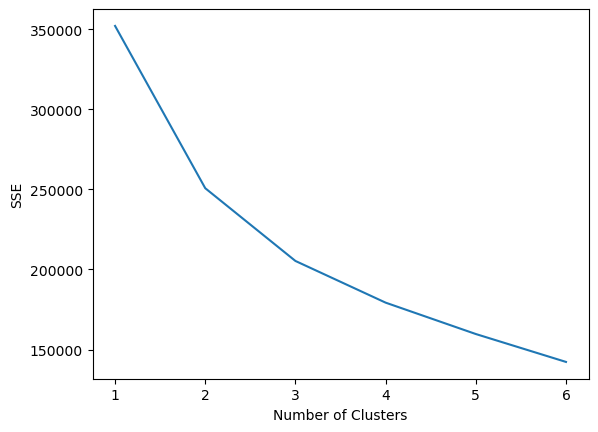

In [40]:
# Calculating SSE for each cluster number using KMeans clustering for medica_data

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(medical_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

#### Displaying medical data before dimensionality reduction

In [41]:
medical_data

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,...,miglitol,troglitazone,examide,citoglipton,insulin,glyburide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,tolbutamide
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
5,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101762,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
101764,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101765,0,0,0,0,0,0,2,0,2,0,...,0,0,0,0,3,0,0,0,0,0


#### Dimensionality reduction: applying Principal Component Analysis (PCA) with 2 components

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(medical_data)

pca = PCA(n_components=2)
pca.fit(scaled_data)

# Extracting principal components and transforming the scaled data
principal_components = pca.components_
medical_PCA_result_data = pca.transform(scaled_data)


print("Principal Components:")
print(principal_components)
print("\n medica PCA2_result_data Data:")
print(medical_PCA_result_data)

Principal Components:
[[ 0.64287437 -0.07511353  0.02869658 -0.04523237  0.07265185 -0.04958781
   0.15982039  0.50447772  0.18505352  0.36516224  0.13592348  0.05790599
   0.03792836  0.          0.         -0.24912156 -0.15945146  0.03208723
   0.          0.05622477 -0.08883256]
 [-0.10754427 -0.15202067 -0.29365273  0.07912076 -0.34159925  0.01537661
  -0.43666201  0.55608149 -0.20714157 -0.29264191 -0.20816067 -0.03479293
  -0.0988492  -0.         -0.         -0.23515727 -0.0458402   0.09864845
  -0.         -0.07684912  0.01039385]]

 medica PCA2_result_data Data:
[[-1.13211852 -0.11933942]
 [ 0.0191206  -0.76693961]
 [-1.13211852 -0.11933942]
 ...
 [ 0.90082328  0.04394007]
 [ 0.04373085 -2.19643457]
 [-0.45265214  0.52204007]]


#### Displaying a scatter plot of the medical_PCA_result_data

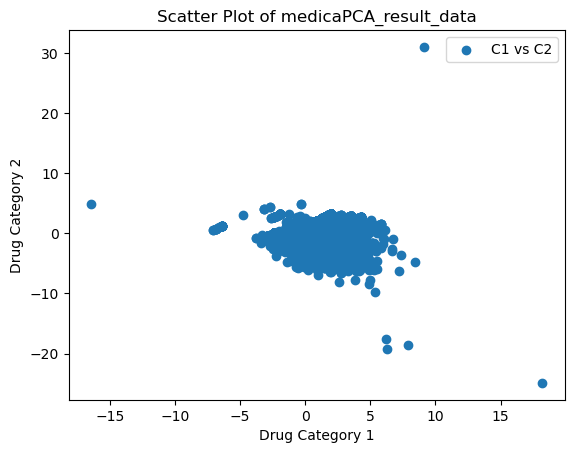

In [44]:
plt.scatter(medical_PCA_result_data[:, 0], medical_PCA_result_data[:, 1], label='C1 vs C2')
plt.xlabel('Drug Category 1')
plt.ylabel('Drug Category 2')
plt.title('Scatter Plot of medicaPCA_result_data')
plt.legend()
plt.show()

#### Calculating SSE for optimal K value after PCA

Text(0, 0.5, 'SSE')

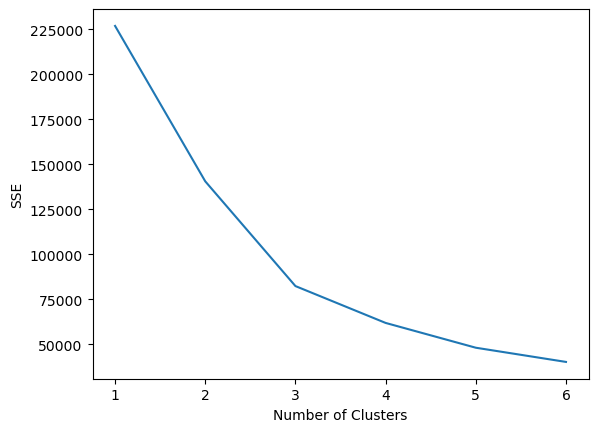

In [45]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(medical_PCA_result_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

#### Silhouette analysis for KMeans clustering

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [47]:
silhouette_data=medical_PCA_result_data.copy()
silhouette_data

array([[-1.13211852, -0.11933942],
       [ 0.0191206 , -0.76693961],
       [-1.13211852, -0.11933942],
       ...,
       [ 0.90082328,  0.04394007],
       [ 0.04373085, -2.19643457],
       [-0.45265214,  0.52204007]])

For n_clusters = 2 The average silhouette_score is : 0.5190920649153501
For n_clusters = 3 The average silhouette_score is : 0.5654884506406115
For n_clusters = 4 The average silhouette_score is : 0.5613796442531527
For n_clusters = 5 The average silhouette_score is : 0.5952519784482795
For n_clusters = 6 The average silhouette_score is : 0.6103258199296435


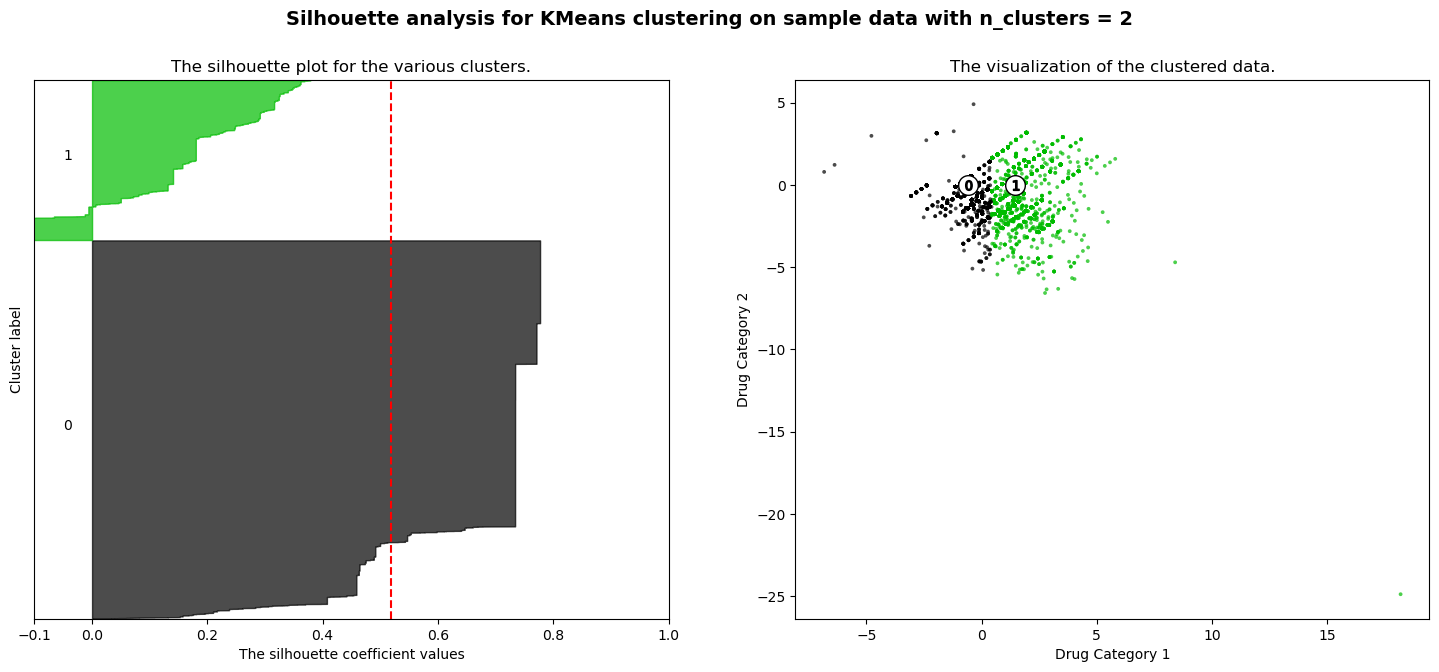

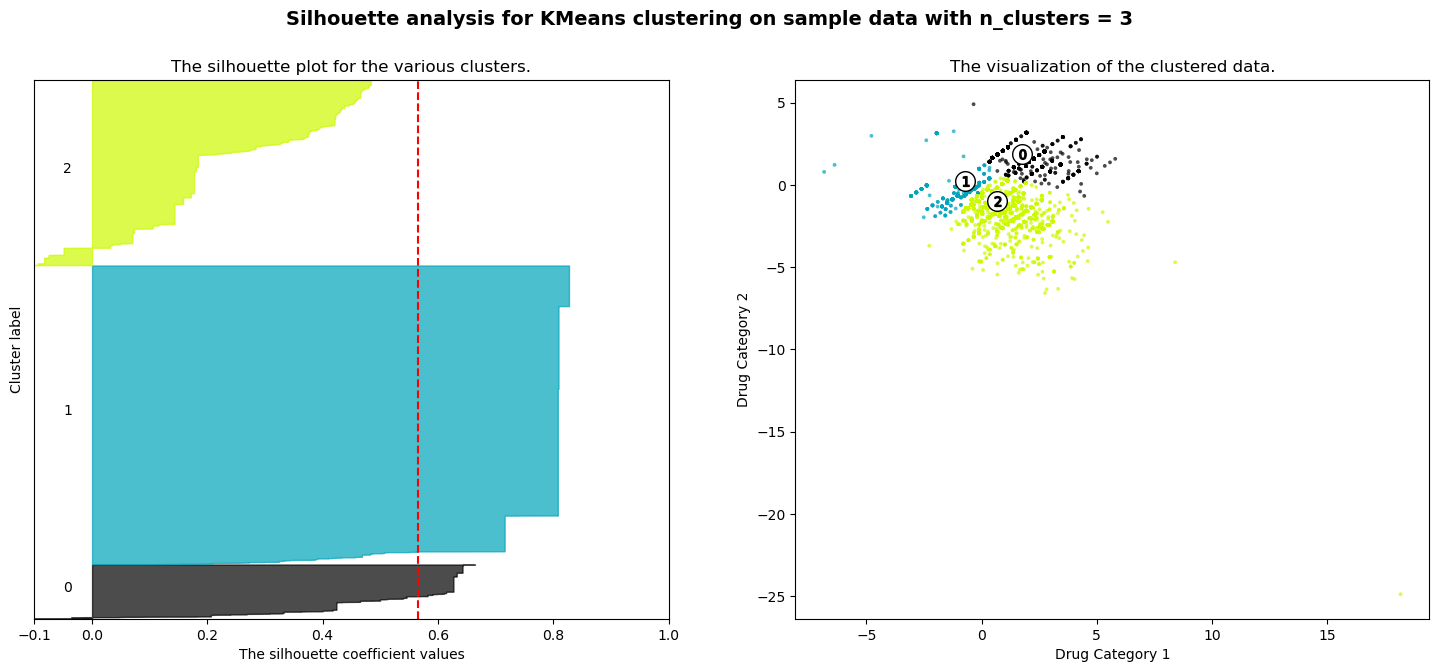

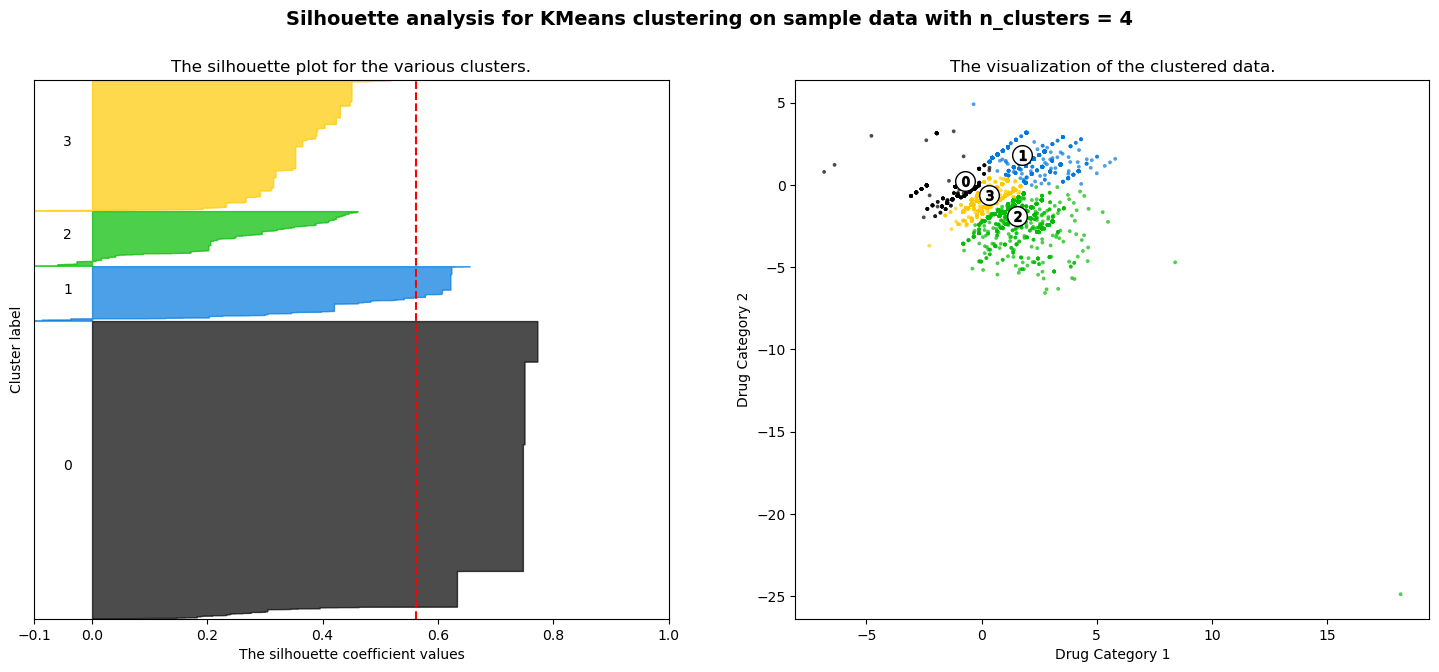

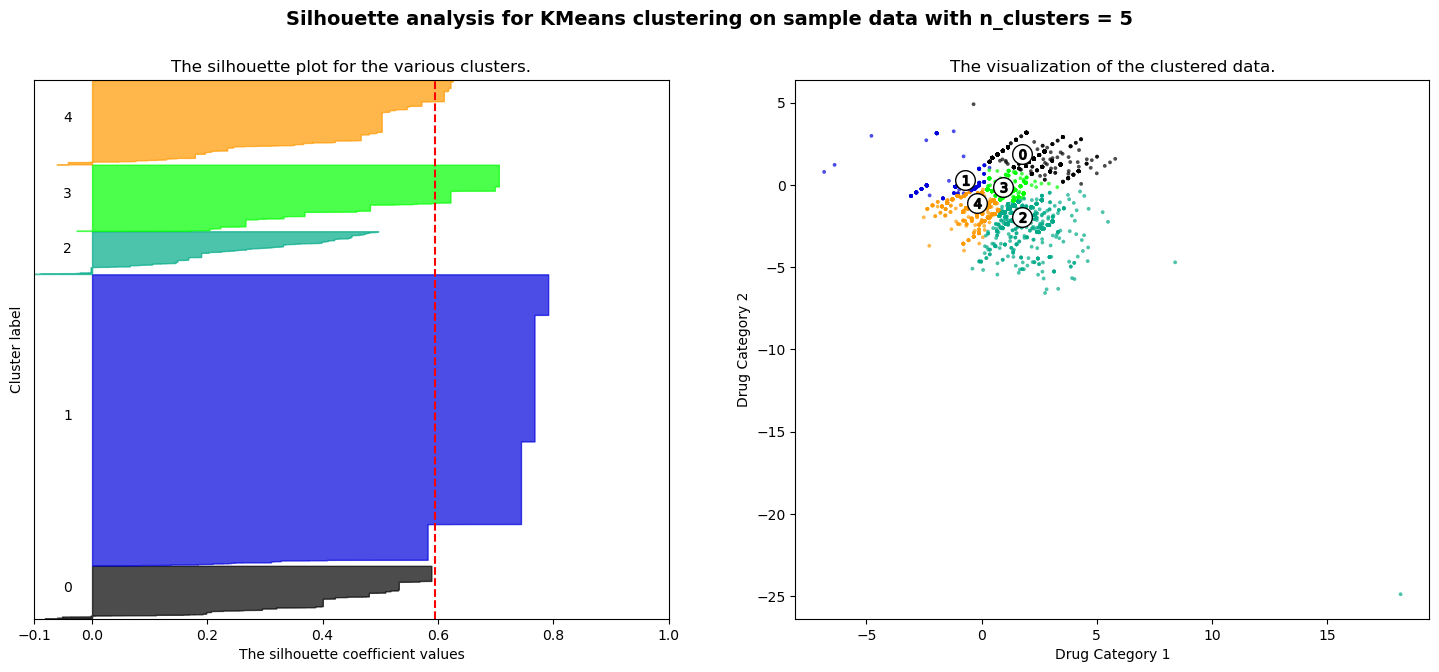

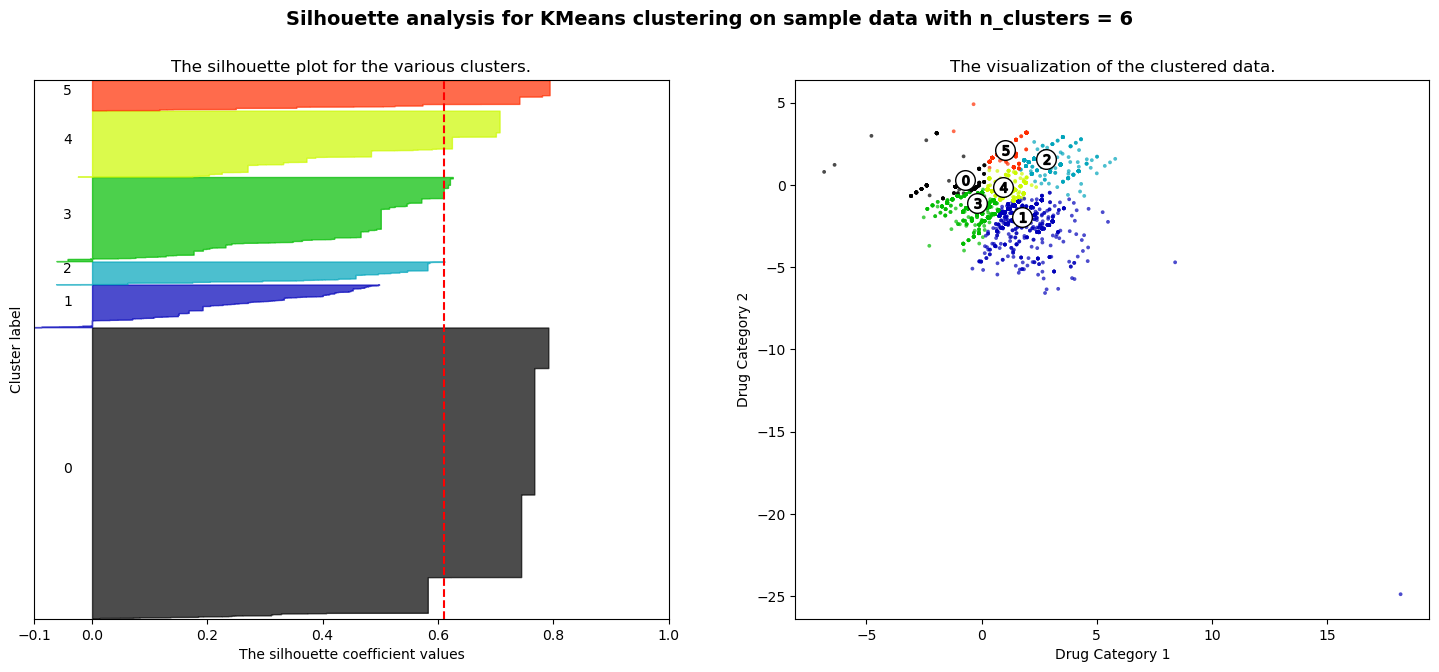

In [48]:
# Randomly select 15,000 samples due to the larger data set
random_indices = np.random.choice(len(silhouette_data), size=15000, replace=False)
X = silhouette_data[random_indices]


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Drug Category 1")
    ax2.set_ylabel("Drug Category 2")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### KMeans clustering on silhouette_data and displaying results

In [49]:
# Displaying the cluster ID result after determining the optimal k value（2）for K-means clustering

k_means = KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(X)  # Data X (15,000 randomly selected samples in the previous step)
labels = k_means.labels_

data_choice_df = pd.DataFrame(X, columns=['Drug Category 1', 'Drug Category 2'])  
data_choice_df['Cluster ID'] = labels

print(data_choice_df.head(20))

    Drug Category 1  Drug Category 2  Cluster ID
0         -0.452652         0.522040           1
1         -0.679141         0.308247           1
2          1.127312         0.257733           0
3         -1.132119        -0.119339           1
4         -1.132119        -0.119339           1
5         -1.040967        -0.668638           1
6         -0.679141         0.308247           1
7          4.607392        -4.636633           0
8         -0.905630         0.094454           1
9          1.128395        -2.397429           0
10        -0.452652         0.522040           1
11         2.048005         1.380196           0
12         0.019121        -0.766940           1
13         1.147507         2.285882           0
14        -0.905630         0.094454           1
15        -0.336890        -1.456753           1
16        -1.132119        -0.119339           1
17         1.146107        -1.458833           0
18        -0.452652         0.522040           1
19         0.723197 

### Report: K-means method



After observing the scatter plot (step 11), we noticed that the data exhibited a single cluster with an elongated elliptical distribution. Subsequently, through data preprocessing and dimensionality reduction, I utilized the SSE method to determine the optimal value of K for K-means clustering as 2.

When K is set to 2, there are cluster 0 and cluster 1. By comparing the data of these two clusters, I found that individuals with low insulin usage were grouped into cluster 0, while those with high insulin usage were in cluster 1. The ratio of insulin usage between cluster 0 and cluster 1 is close to 1:11. It is tentatively speculated that the classification rules of the clusters are related to insulin usage.

Cluster ID insulin
Cluster 0 0.204946
Cluster 1 2.270668

However, during the silhouette coefficient analysis of the K-means clustering (step 13), I observed that the average silhouette coefficient continued to increase as K increased after multiple runs, which may indicate a risk of overfitting with an increased number of clusters. Although the selected K value of 2 is considered the optimal number of clusters, the resulting average silhouette coefficient is only around 0.52, indicating a medium rate, and it is the lowest among other K values.

For n_clusters = 2
The average silhouette_score is : 0.5250715248632978

For n_clusters = 3
The average silhouette_score is : 0.5497215580266462

For n_clusters = 4
The average silhouette_score is : 0.5378325842808004

For n_clusters = 5
The average silhouette_score is : 0.5328484750640221

For n_clusters = 6
The average silhouette_score is : 0.5812506724093558

However, we know that the K-means clustering method is not suitable for handling non-circular shaped clusters, while our data exhibits a non-circular distribution. Therefore, the poor performance of the results is reasonable, as our data, being non-circular, is not suitable for analysis using the K-means clustering method. Thus, the reliability of inferring the correlation between insulin usage and the classification rules of K-means clusters is questionable.

Therefore, I need to find a clustering method suitable for handling this type of clusters. In this regard, we opted for the second method of DBSCAN because DBSCAN is a clustering algorithm adept at handling non-circular clusters.

## DBSCAN

#### Prepare data for DBSCAN clustering

In [50]:
from sklearn.cluster import DBSCAN

In [51]:
DBSC_data=medical_PCA_result_data.copy()

In [52]:
# Due to the significant computational resources required by the DBSCAN algorithm, 
# I opted to randomly select 15,000 samples for analysis

random_indices = np.random.choice(len(DBSC_data), size=15000, replace=False)
selected_data = DBSC_data[random_indices]

# Convert 'selected data' to a DataFrame
data_df = pd.DataFrame(selected_data, columns=['Drug Category 1', 'Drug Category 2'])

#### Perform DBSCAN clustering with different values
#### value 1: eps=3, min_samples=80

<AxesSubplot:xlabel='Drug Category 1', ylabel='Drug Category 2'>

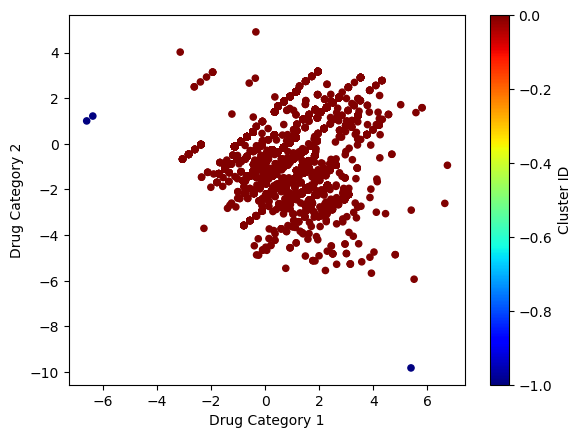

In [53]:
db = DBSCAN(eps=3, min_samples=80).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

#### value 2: eps=1, min_samples=80

<AxesSubplot:xlabel='Drug Category 1', ylabel='Drug Category 2'>

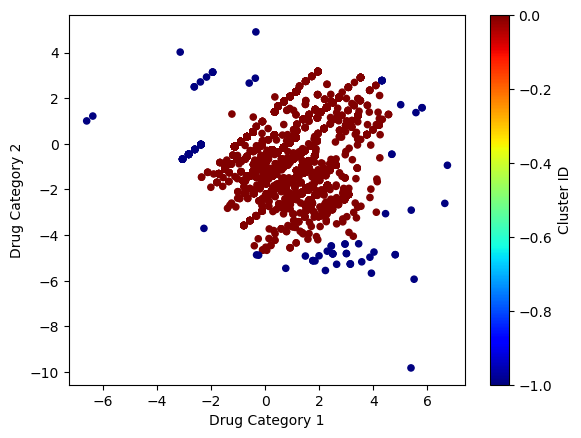

In [54]:
db = DBSCAN(eps=1, min_samples=80).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

#### value 3: eps=0.5, min_samples=60

<AxesSubplot:xlabel='Drug Category 1', ylabel='Drug Category 2'>

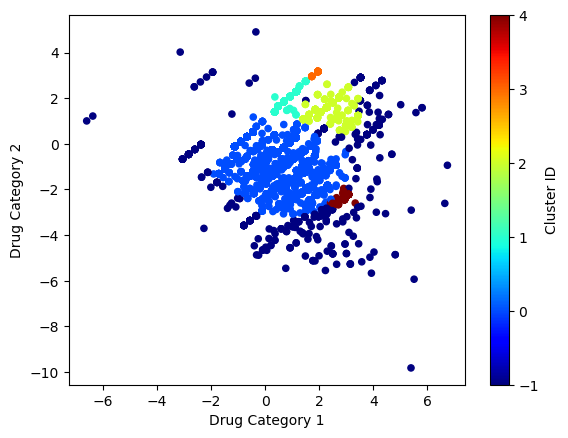

In [55]:
db = DBSCAN(eps=0.5, min_samples=60).fit(selected_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Concatenate data_df and labels
result = pd.concat([data_df, labels], axis=1)

# Plot the scatter plot
result.plot.scatter('Drug Category 1', 'Drug Category 2', c='Cluster ID', colormap='jet')

### Report: DBSCAN Method

Due to the significant computational resources required by the DBSCAN algorithm, I opted to randomly select 15,000 samples for analysis.

In the DBSCAN plot, we can visually observe that our clusters are elongated ellipses. If the DBSCAN analysis results highly overlap with the visually observed clusters, it indicates that our data is well-suited for this algorithm; otherwise, it is not. After trying various parameters, I selected the following three pairs for analysis:

- Value 1: eps=3, min_samples=80
- Value 2: eps=1, min_samples=80
- Value 3: eps=0.5, min_samples=60

Upon adjusting the parameters, I found that when using Value 1, an ideal cluster was formed,and the outlier points were excluded from the cluster. Values lower than this threshold resulted in multiple clusters, which broke down the ideal cluster—a result we did not desire. Therefore, at this stage, I compared the results with those of K-means. Without knowing the K value, we adjusted the density parameters and obtained ideal cluster formations. The conclusion at this stage is that DBSCAN is more suitable for clustering our data compared to the K-means algorithm.

However, I still wanted to explore a third clustering method to see if it could outperform DBSCAN. Hence, I utilized Hierarchical Clustering.

## Hierarchical clustering

#### Prepare data for hierarchical clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [57]:
hiera_data=medical_PCA_result_data.copy()

In [58]:
# Due to the higher computational cost of hierarchical clustering, I limited the dataset to 10000 points

random_indices = np.random.choice(len(hiera_data), size=10000, replace=False)
selected_data = hiera_data[random_indices]


# Convert 'data' to a DataFrame
data_df = pd.DataFrame(selected_data, columns=['Drug Category 1', 'Drug Category 2'])

#### Displaying the scatter plot of the selected data before analysis.

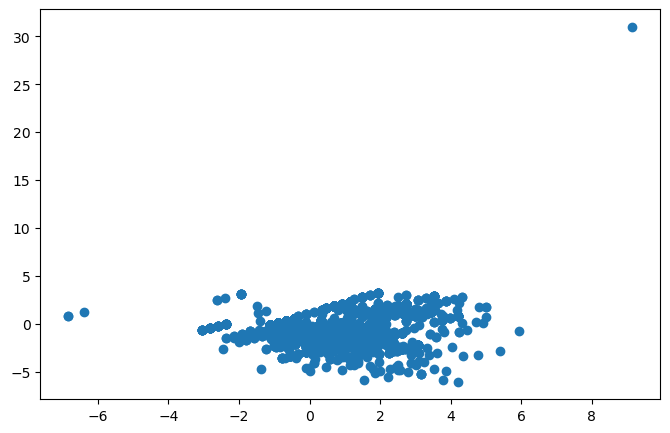

In [59]:
plt.figure(figsize=(8, 5))
plt.subplots_adjust(bottom=0.1)
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1])

plt.show()

#### Setting cluster value to 2 for Hierarchical Clustering analysis, and testing 3 different linkage methods to find the best fit for our dataset

 #### Linkage= Single Link

In [60]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='single')
cluster_labels = cluster.fit_predict(data_df)
print(cluster_labels)

[0 0 0 ... 0 0 0]


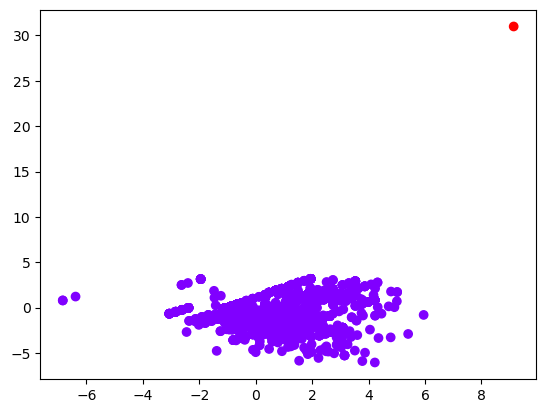

In [61]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

#### Linkage = Complete Link

In [62]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
cluster_labels = cluster.fit_predict(data_df)

print(cluster_labels)

[0 0 0 ... 0 0 0]


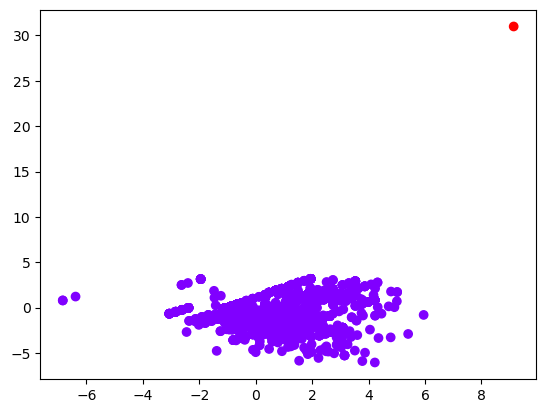

In [63]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

#### Linkage = Average

In [64]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='average')
cluster_labels = cluster.fit_predict(data_df)
print(cluster_labels)

[0 0 0 ... 0 0 0]


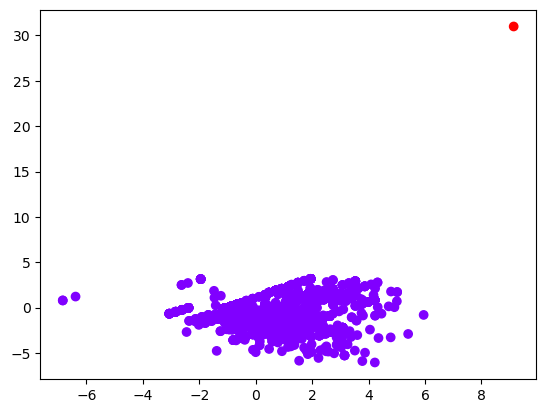

In [65]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

### Report: Hierarchical Clustering

Due to the higher computational cost associated with hierarchical clustering, I limited the dataset to 10,000 points. Additionally, based on the previous SSE analysis, we determined that the optimal value of K for clustering is 2. Therefore, I selected K=2 for clustering. In Step 2, we observed an elongated cluster with a few outlier points in the original scatter plot.

After conducting analyses using Single Link, Complete Link and Average Link, we noticed minimal variation in results across different linkage methods (single, complete, and average) due to the high density of the random data we generated (the dataset of every run is different).

However, in scenarios with a higher density of outliers, the results obtained using the average linkage method were more stable and less affected by outliers compared to the single linkage method, which exhibited the greatest sensitivity to outliers. Since my data is primarily discrete, I prefer to use the average linkage method for hierarchical clustering.

Given the substantial size of our dataset (over 90,000 rows), employing hierarchical clustering would be particularly slow and inefficient. Therefore, I believe it is not the optimal choice. Considering both computational cost and efficiency, I conclude that hierarchical clustering is not superior to the DBSCAN algorithm for our dataset.

Hence, the final conclusion is that DBSCAN is the most suitable choice for our data, not only for its suitability in analyzing our non-circular shaped clusters but also for its superior performance in terms of computational cost and speed compared to hierarchical clustering.

# Task 7 Final Results